In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

In [2]:
corr_df = pd.read_csv('python_correlations.csv')
reg_df = pd.read_csv('python_regression.csv')

Correlation Matrix:
               weekly_sales  holiday_flag  fuel_price       cpi  unemployment  \
weekly_sales      1.000000      0.036891    0.009464 -0.072634     -0.106176   
holiday_flag      0.036891      1.000000   -0.078347 -0.002162      0.010960   
fuel_price        0.009464     -0.078347    1.000000 -0.170642     -0.034684   
cpi              -0.072634     -0.002162   -0.170642  1.000000     -0.302020   
unemployment     -0.106176      0.010960   -0.034684 -0.302020      1.000000   
temperature      -0.063810     -0.155091    0.144982  0.176888      0.101158   

              temperature  
weekly_sales    -0.063810  
holiday_flag    -0.155091  
fuel_price       0.144982  
cpi              0.176888  
unemployment     0.101158  
temperature      1.000000  


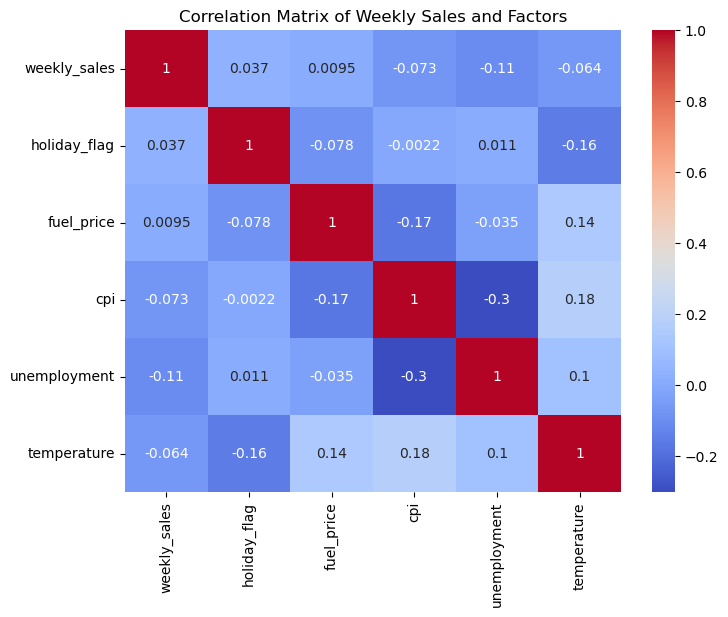

In [3]:
corr_matrix = corr_df.corr()

print("Correlation Matrix:\n", corr_matrix)

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Weekly Sales and Factors")
plt.show()

In [4]:
X = reg_df[['holiday_flag', 'fuel_price', 'cpi', 'unemployment', 'temperature']]
y = reg_df['weekly_sales']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           weekly_sales   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                     33.57
Date:                Wed, 20 Aug 2025   Prob (F-statistic):           5.93e-34
Time:                        15:23:05   Log-Likelihood:                -94269.
No. Observations:                6435   AIC:                         1.886e+05
Df Residuals:                    6429   BIC:                         1.886e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1.727e+06   7.98e+04     21.646   

In [5]:
holiday_avg = reg_df.groupby('holiday_flag')['weekly_sales'].mean()
print("Average Weekly Sales:")
print(holiday_avg)

Average Weekly Sales:
holiday_flag
0    1.041256e+06
1    1.122888e+06
Name: weekly_sales, dtype: float64


In [6]:
uplift = ((holiday_avg[1] - holiday_avg[0]) / holiday_avg[0]) * 100
print(f"Average Holiday Sales Uplift: {uplift:.2f}%")

Average Holiday Sales Uplift: 7.84%
